# Simple Linear Regression Implementation From Scratch

## Importing Necessary Libraries

In [1]:
import pandas as pd                                 # Reading data from .csv file
import numpy as np                                  # Handling scientific operations
import matplotlib.pyplot as plt                     # Visualizing data and regression lines

## Importing the Dataset

In [2]:
dataset = pd.read_csv('./Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Visualizing Dataset

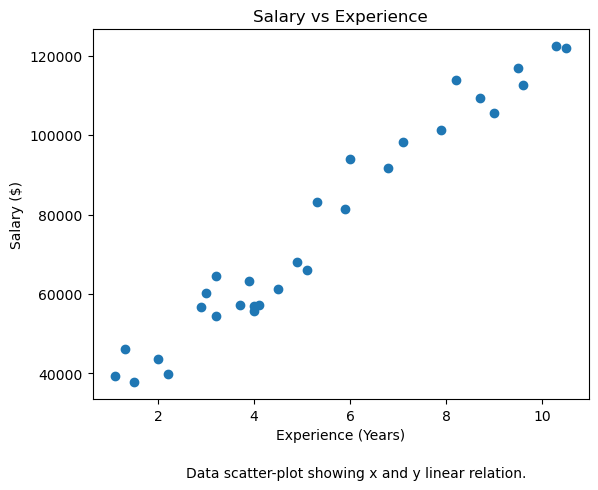

In [3]:
plt.scatter(X, y)
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')
plt.title('Salary vs Experience')
plt.annotate('Data scatter-plot showing x and y linear relation.'
             ,xy = (0.875, -0.2)
             ,xycoords='axes fraction' 
             ,ha='right',va="center")

plt.show()

## Splitting the Dataset into Training, Cross Validation and Test sets

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_, y_train, y_ = train_test_split(X, y, train_size = 0.6, random_state = 42)
X_CV, X_test, y_CV, y_test = train_test_split(X_, y_, test_size = 0.5, random_state = 42)

## Defining Simple Linear Regression Class

In [5]:
class CustomSimpleLinearRegression(object):
    
    def __init__(self, max_iter = 1000, learning_rate = 0.01):
        
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.weight = 0
        self.bias = 0
        
    def fit(self, X, y):
        
        n_samples = X.shape[0]
        
        for i in range(self.max_iter):
             
            y_hat = X * self.weight + self.bias
            
            dj_dw = (1 / n_samples) * np.dot((y_hat.T - y), X)
            dj_db = np.average(y_hat.T - y)
            
            self.weight = self.weight - self.learning_rate * dj_dw
            self.bias = self.bias - self.learning_rate * dj_db
    
    def predict(self, X):
        
        return X * self.weight + self.bias
    

## Creating Instance and Fitting Model

In [6]:
slr = CustomSimpleLinearRegression()
slr.fit(X_train, y_train)

## Making Predictions

In [7]:
y_train_pred = slr.predict(X_train)
y_CV_pred = slr.predict(X_CV)
y_test_pred = slr.predict(X_test)

## Evaluate the model and displaying the confusion matrix

In [8]:
from sklearn.metrics import r2_score
print("Training set r^2 score:            ", r2_score(y_train, y_train_pred))
print("Cross validation set r^2 score:    ", r2_score(y_CV, y_CV_pred))
print("Test set r^2 score:                ", r2_score(y_test, y_test_pred))

Training set r^2 score:             0.956316392918354
Cross validation set r^2 score:     0.928269639824308
Test set r^2 score:                 0.9632441104898656
